## Herramientas de Visualización

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Gráficos de Barras

#### Ejemplo 1
Tenemos las puntuaciones de 5 equipos, del E1 al E5, separados por categorías, nombradas como Categoría 1 en color azul y Categoría 2 en color anaranjado.

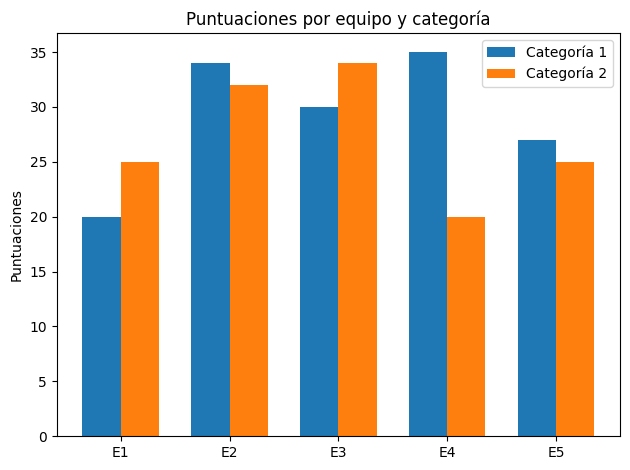

In [3]:
labels = ['E1', 'E2', 'E3', 'E4', 'E5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # Ubicación de las etiquetas
width = 0.35  # Ancho de las barras

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Categoría 1')
rects2 = ax.bar(x + width/2, women_means, width, label='Categoría 2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Puntuaciones')
ax.set_title('Puntuaciones por equipo y categoría')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()  # Ajusta el espaciado de los elementos del gráfico para que quepa todo en la figura.

plt.show()

#### Ejemplo 2

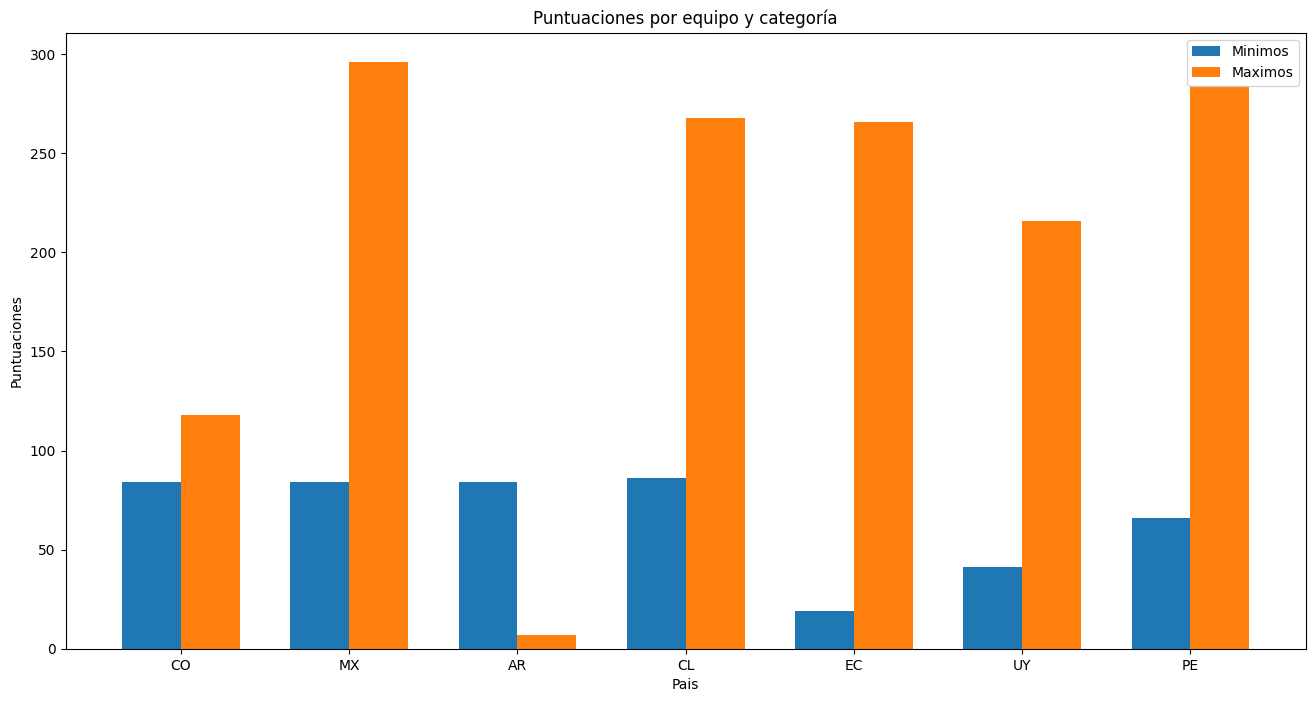

In [4]:
# Valores Generales
np.random.seed(111)
paises = ['CO','MX','AR','CL','EC','UY','PE']
salarios_minimos = np.random.randint(low=100, high=None, size = len(paises))
salarios_maximos = np.random.randint(low=300, high=None, size = len(paises))
x = np.arange(len(paises))  # Ubicación de las etiquetas
width = 0.35  # Ancho de las barras
fig, ax = plt.subplots(figsize =(16,8))

# Grafico 
rects1 = ax.bar(x - width/2,salarios_minimos, width, label='Minimos')
rects2 = ax.bar(x + width/2,salarios_maximos, width, label='Maximos')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Puntuaciones')
ax.set_xlabel('Pais')
ax.set_title('Puntuaciones por equipo y categoría')
ax.set_xticks(x)
ax.set_xticklabels(paises)
ax.legend()


plt.show()

## Histogramas

#### Ejemplo 1

Considere una distribución normal. A partir de su función de densidad realice un histograma para 500 estimaciones aleatorias, con una media $\mu = 170$ y una varianza de $\sigma^2 = 100$. <br> $f(x | \mu, \sigma^2) = \frac{1}{\sigma\sqrt{2\pi} } \; e^{ -\frac{(x-\mu)^2}{2\sigma^2} }$

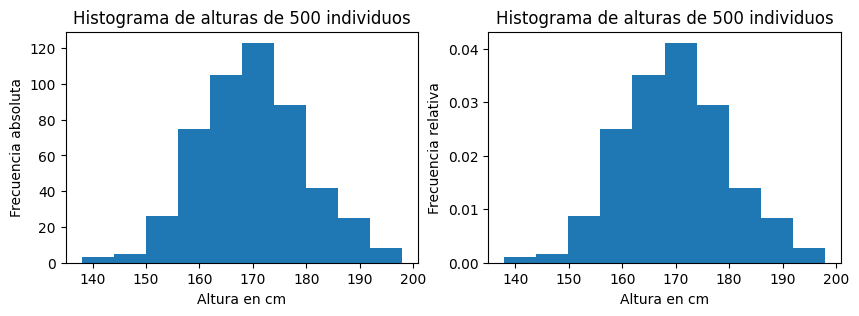

In [5]:
np.random.seed(1970627)   # Elegimos un número al azar de semilla

# Parámetros para generar una distribución normal:
mu = 170       # Media
sigma = 10     # Desviación estándar
x = mu + sigma * np.random.randn(500)   # Generación aleatoria de puntos a partir de los parámetros
x = np.round(x, decimals=2)

num_bins = 500      # Muestra de 500 alturas aleatorias

# 1, 2: especifica que se creará una fila de dos subplots.
# sharey = False: especifica que los subplots no compartirán el eje y.
# Esto significa que el rango del eje y en cada subplot puede ser diferente.

fig, ax = plt.subplots(1, 2, sharey=False, figsize =(10,3))

# Histograma de datos:

# n: es un arreglo que contiene el número de observaciones en cada contenedor del histograma. Es decir, 
# si se define que el histograma tendrá 10 contenedores, n es un arreglo de 10 elementos, donde cada elemento 
# representa el número de observaciones que caen dentro de ese contenedor.

# bins: es un arreglo que contiene los límites de los contenedores utilizados en el histograma. Es decir, 
# si se define que el histograma tendrá 10 contenedores, bins es un arreglo de 11 elementos que 
# define los límites de los 10 contenedores.

# patches: es una lista de objetos que representan los contenedores gráficos del histograma. 
# Cada objeto patch contiene información sobre la ubicación, tamaño y color de cada contenedor.

n, bins, patches = ax[0].hist(x, density=False)   # Frecuencia absoluta
n, bins, patches = ax[1].hist(x, density=True)    # Frecuencia relativa


# Ajuste de linea de densidad estimada:
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

#ax[0].plot(bins, y, '--')
ax[1].set_xlabel('Altura en cm')
ax[1].set_ylabel('Frecuencia relativa')
ax[1].set_title(r'Histograma de alturas de 500 individuos')

#ax[1].plot(bins, y, '--')
ax[0].set_xlabel('Altura en cm')
ax[0].set_ylabel('Frecuencia absoluta')
ax[0].set_title(r'Histograma de alturas de 500 individuos')

plt.show()

#### Ejemplo 2

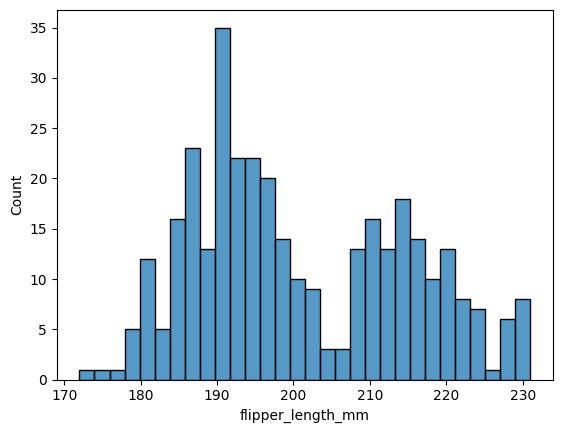

In [6]:
# Utilizamos la biblioteca Seaborn para generar un histograma de la longitud de la aleta de los pingüinos:

penguins = sns.load_dataset("penguins")   # Cargamos el conjunto de datos desde Seaborn
sns.histplot(data=penguins, x="flipper_length_mm", bins=30)     # Ploteamos un histograma
plt.show()

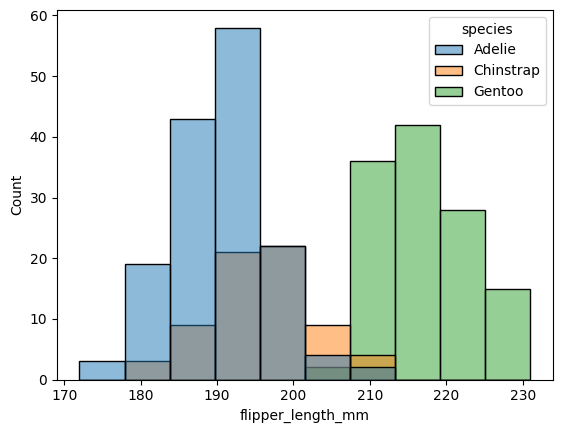

In [7]:
# Utilizamos el parámetro 'hue' para agregar una dimensión adicional al gráfico, en este caso,
# se creará un histograma separado para cada especie de pingüino:

sns.histplot(data=penguins, x="flipper_length_mm", hue="species")
plt.show()

## Series de Tiempo

#### Ejemplo

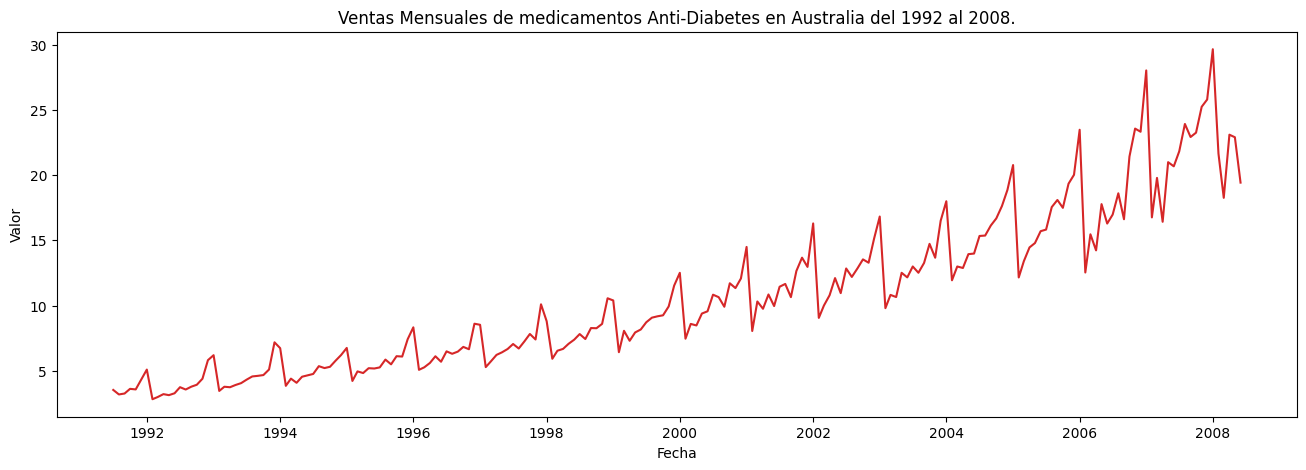

In [8]:
# Cargamos nuestro DF:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Definimos la función 'plot_df' para generar un gráfico en Matplotlib:
def plot_df(df, x, y, title="", xlabel='Fecha', ylabel='Valor', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Ventas Mensuales de medicamentos Anti-Diabetes en Australia del 1992 al 2008.') 

El siguiente código generará un gráfico en 3D de puntos aleatorios en un espacio tridimensional:

- En la primera línea, se establece la semilla del generador de números aleatorios de numpy para asegurar la reproducibilidad de los resultados.
- La función `randrange` se define para generar un conjunto de `n` números aleatorios dentro de un rango dado (`vmin` y `vmax`).
- Luego, se crea una figura y un objeto Axes3D para el gráfico en 3D.
- Se establece el estilo y la posición de los marcadores de los puntos en el espacio tridimensional mediante la función `scatter` de Axes3D. La posición de cada punto se determina por las coordenadas (x,y,z) generadas por la función randrange.
- Se establecen las etiquetas de los ejes x, y, y z mediante los métodos `set_xlabel`, `set_ylabel`, y `set_zlabel`.
- Finalmente, se muestra el gráfico mediante la función `show` de matplotlib.

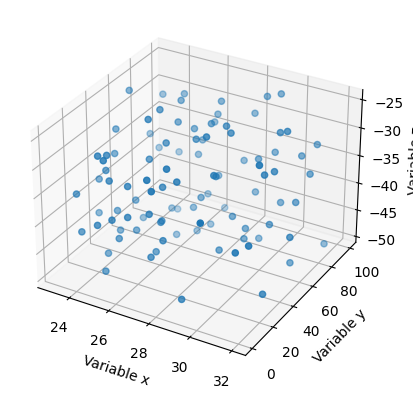

In [9]:
np.random.seed(19700627)

def randrange(n, vmin, vmax):
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

m, zlow, zhigh = ('o', -50, -25)
xs = randrange(n, 23, 32)
ys = randrange(n, 0, 100)
zs = randrange(n, zlow, zhigh)
ax.scatter(xs, ys, zs, marker=m)


ax.set_xlabel('Variable x')
ax.set_ylabel('Variable y')
ax.set_zlabel('Variable z')

plt.show()

En esta línea de código se utiliza la librería `Seaborn` para crear una matriz de gráficos de dispersión (scatter plots) y distribuciones para cada variable numérica del conjunto de datos `penguins`. La función `pairplot()` toma como argumento el dataframe `penguins`. Cada gráfico de dispersión muestra la relación entre dos variables numéricas, y cada distribución muestra la distribución univariada de cada variable numérica.

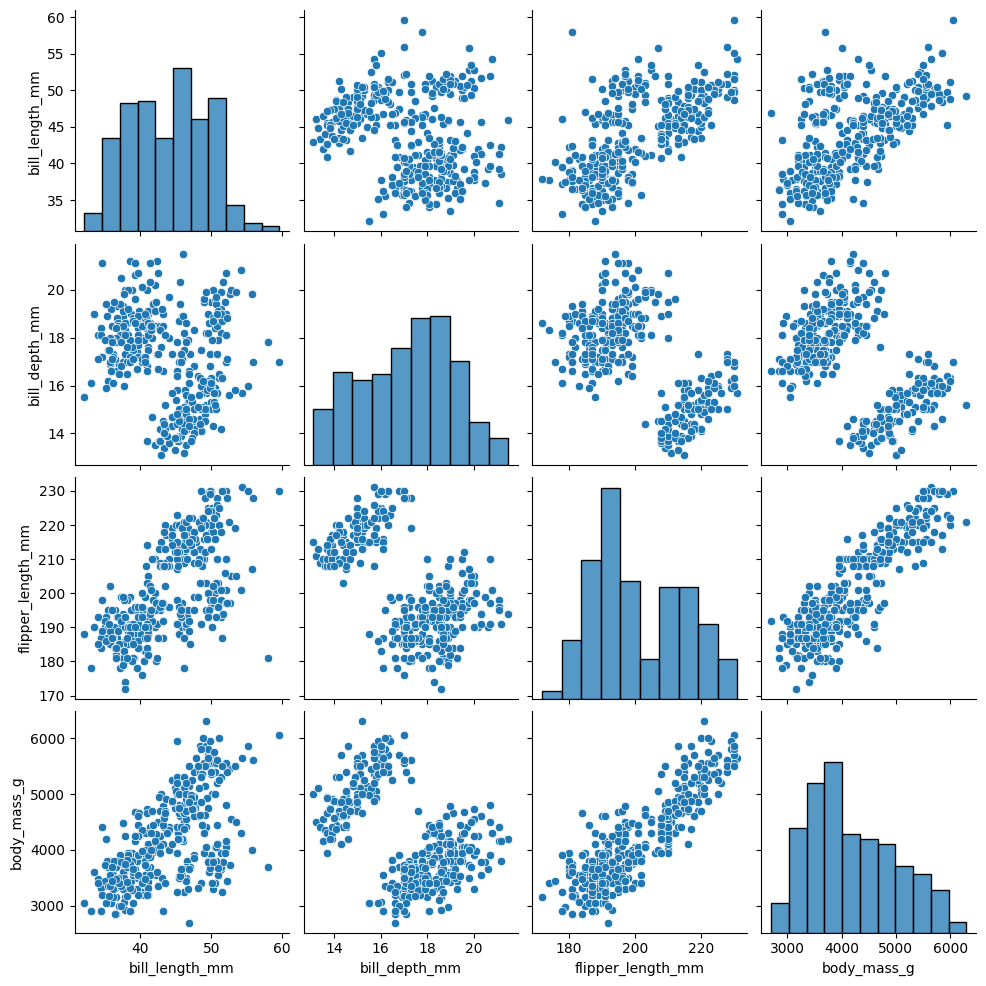

In [10]:
sns.pairplot(penguins)
plt.show()

## Boxplots and Violin

#### Ejemplo

En este código vamos a utilizar la librería `Seaborn` para graficar un diagrama de caja (boxplot) que compara los montos de la cuenta en función del género y si es fumador o no, en función de la hora del día (almuerzo o cena). El dataset utilizado es el **"tips"** dataset de `Seaborn`, que contiene información sobre propinas y pagos de clientes en un restaurante.

Analizamos las variables:
- sns.catplot(): es una función de Seaborn para crear diagramas de categoría (categorical plots).
- x="sex", y="total_bill": el eje x representa el género (hombre o mujer) y el eje y representa el monto total de la cuenta (en dólares).
- hue="smoker", col="time": el color del diagrama se divide según si el cliente es fumador o no (smoker), mientras que la división de    columnas está según la hora del día (lunch o dinner).
- data=tips: especifica el dataset utilizado, en este caso, el 'tips dataset de Seaborn'.
- kind="box": especifica el tipo de gráfico utilizado, en este caso, un diagrama de caja.
- height=4, aspect=.7: ajustan el tamaño del diagrama y su proporción de aspecto.
- plt.show(): muestra el diagrama de caja generado por Seaborn.

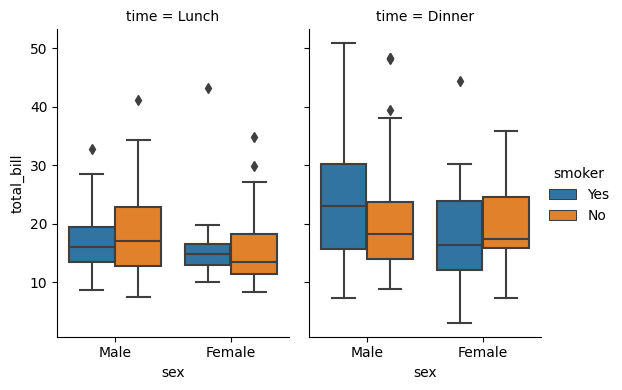

In [11]:
tips = sns.load_dataset("tips")
sns.catplot(x="sex", y="total_bill",
                hue="smoker", col="time",
                data=tips, kind="box", #split=True,
                height=4, aspect=.7)
plt.show()

## Gráfico de Radar

#### Ejemplo

Este código realiza una gráfica de radar (también llamada gráfica de araña o gráfica de telaraña) para un conjunto de datos que contiene varias variables y grupos. En la primera parte del código, se define una función make_spider() que recibe como argumentos una fila del conjunto de datos, un título para la gráfica y un color.

La función make_spider() define los ángulos de cada eje de la gráfica (correspondientes a cada variable), y luego dibuja cada eje en la posición correspondiente. A continuación, se grafica una línea que conecta los valores de cada variable para el grupo de datos correspondiente, y se rellena el área del polígono formado por esta línea.

En la segunda parte del código, se crea una paleta de colores y se itera sobre cada fila del conjunto de datos, llamando a la función make_spider() para cada grupo de datos. Cada grupo se grafica en una subfigura de un arreglo de 2x2 subfiguras, con el título adecuado y el color correspondiente.

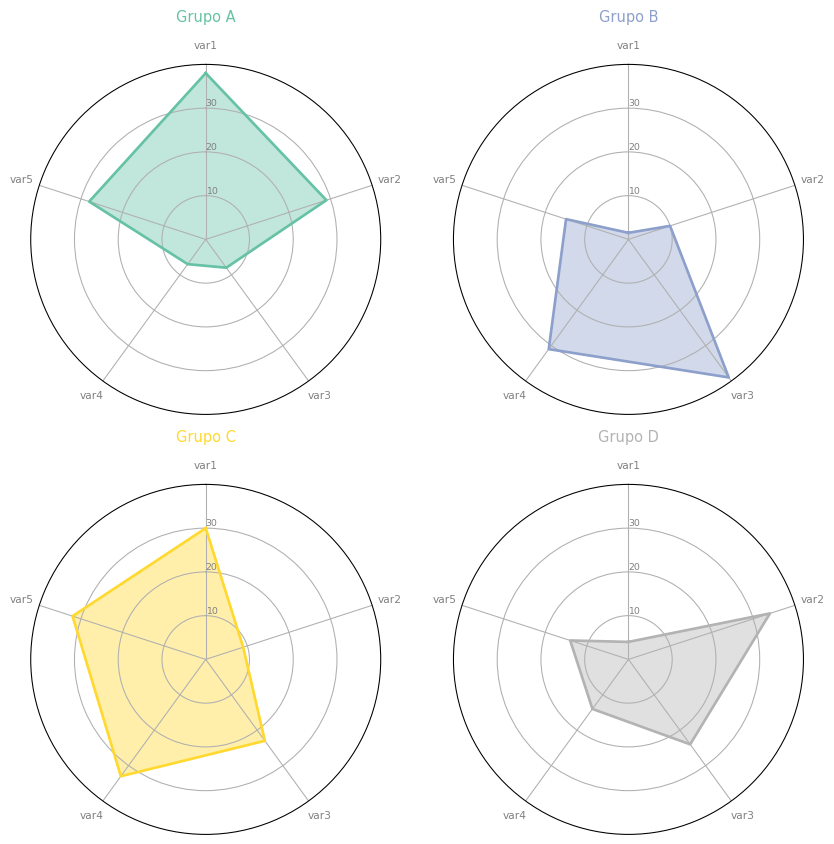

In [12]:
from math import pi
 
# Definimos el set de datos a graficar:
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 
# ------- PARTE 1: Definimos una función que haga un gráfico para una línea del conjunto de datos:
 
def make_spider( row, title, color):

    # Donde:
    # row: es el número de fila actual que se está procesando.
    # title: es el título que se utilizará para la gráfica.
    # color: es el color que se utilizará para la línea y la zona de relleno.

    # Número de variables:
    categories = list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    plt.ylim(0,40)

    # Ind1
    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

    
# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title='Grupo '+df['group'][row], color=my_palette(row))

In [13]:
list(df)[1:]

['var1', 'var2', 'var3', 'var4', 'var5']

## Caras de Chernoff

#### Ejemplo